1. Project overview -
The North American Basketball association, also known as the NBA, is the world's best league when it comes to basketball. It is a multi billion dollar business in which the world's best players come to play. Throughout most of its history, up intil the late 2000s, basketball was played inefficiently. The best shot was whatever shot the star player seemed worth taking. This led to many crazy inefficient games, where scores consistenly averaged below the 100s. Then in 2003, NBA coach Mike D'Antoni began to revolutionize basketball by starting the analytics movement.  While the adoptation of analytics was slow, today's game is dominated by such statiscs, and changed the game into having the scoring explosion it has today. Models now help guide free agency signings and team creation. Looking at players statistics is the key to creating championship worthy rosters.
The goal for this project is to create a model that can analyze selected features and see their impact in winning. The feature I selected to predict is win shares. Win shares is a statistic created by Dean Oliver that tries to estimate the amount of wins a player contributes to their team. While this stat doesn't paint the whole picture of players actual impact, and has been known to be misused a lot, it is still a good place to start when trying to evaluate a players impact to winning. My hypothesis is that players with high points per game, field goal percentage, and true shooting, will have high win shares.

In [11]:
# Importing all the needed packages for data visualization and exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



player_stats = pd.read_csv('Seasons_Stats.csv')

features = ['PTS', 'FG%', 'TS%']
target = 'WS'

player_stats = player_stats.dropna(subset=features + [target])

# Split the data and prepare it for the model
X = player_stats[features]
y = player_stats[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Data Preparation - SkLearn's linear regression model only works if there is no empty cells of data. Because of how stat tracking works in the NBA, there are players who's data is missing simply because the NBA hadn't started recording the stat yet. Certain statistics, like blocks per season, took several decades before the NBA decided to keep track of this statistic. Because of this, I had to make sure the data was free from any empty cells and looked for features that specifically had been tracked since the beginning of the league.

Text(0.5, 1.0, 'TS% vs WS')

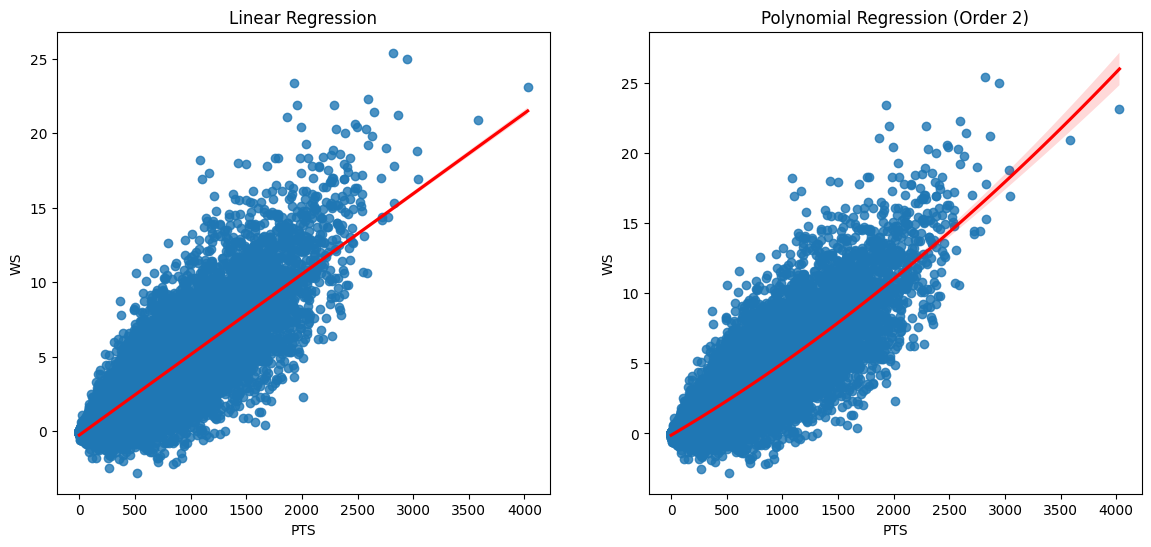

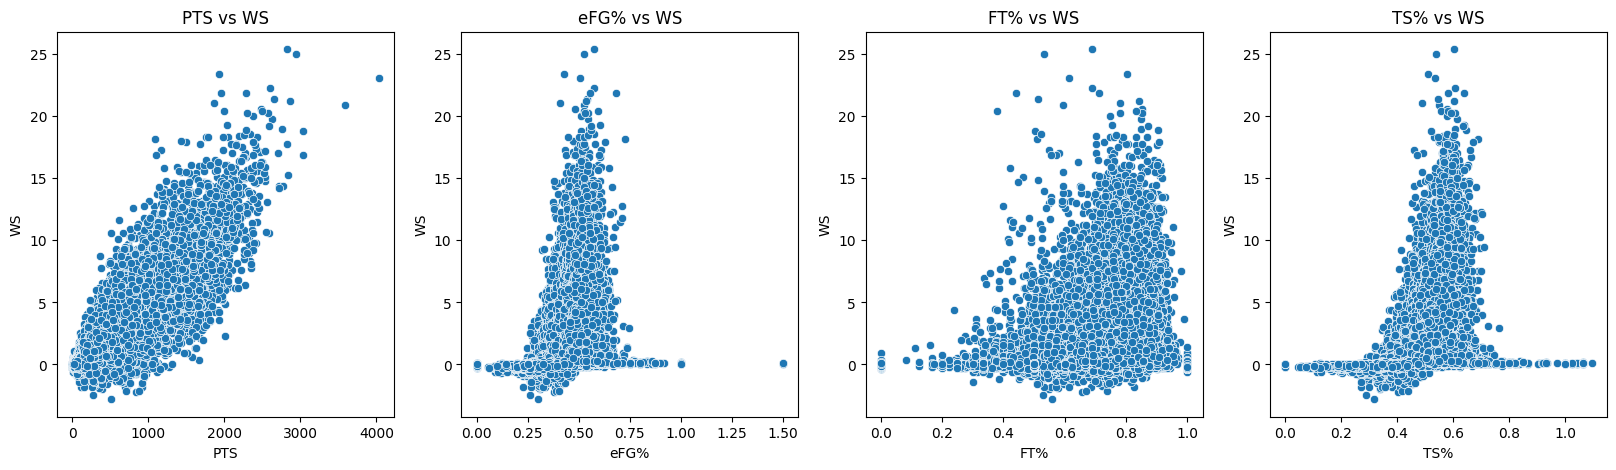

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.regplot(data=player_stats, x="PTS", y="WS", ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Linear Regression')
sns.regplot(data=player_stats, x="PTS", y="WS", order=2, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Polynomial Regression (Order 2)')

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot each scatterplot in a separate subplot
sns.scatterplot(data=player_stats, x='PTS', y='WS', ax=axs[0])
axs[0].set_title('PTS vs WS')

sns.scatterplot(data=player_stats, x='eFG%', y='WS', ax=axs[1])
axs[1].set_title('eFG% vs WS')

sns.scatterplot(data=player_stats, x='FT%', y='WS', ax=axs[2])
axs[2].set_title('FT% vs WS')

sns.scatterplot(data=player_stats, x='TS%', y='WS', ax=axs[3])
axs[3].set_title('TS% vs WS')

3. Data Discovery and Exploration - My strategy for deciding features was seeing how they looked in relation to win shares. After seeing them graphed, I would then bring in background knowledge to fill in the blanks and explain the data. For example, PTS vs WS shows a somewhat polynomial relationship, which makes sense. Players that score a lot tend to be very good players. While eFG and TS seem to be higher in the middle of the graph, this actually makes sense. League average for TS% is 0.56. Elite players tend to have their TS% be around 0.60. Any player who averages 0.65 or higher for a whole season tend to be end of bench players who don't average a lot of minutes. This causes their volume of shots to be very low making it a lot easier to be more efficient. This analysis is further backed up by looking at the respective graphs where a high TS% actualy has low WS.

Mean Absolute Error: 0.9833770492191686
Mean Squared Error: 2.191322241257698
R-squared: 0.7743839098746353


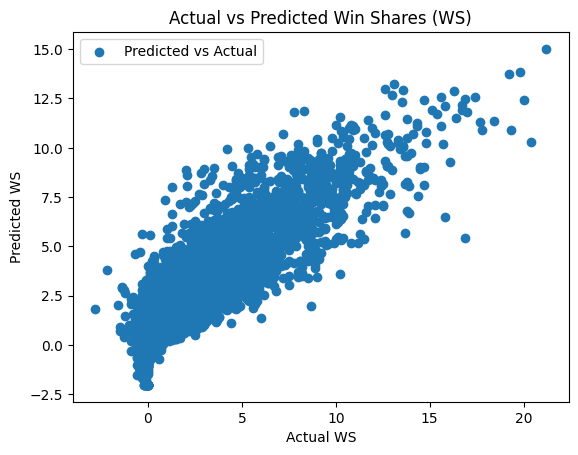

In [13]:
# Create a Linear Regression model and train it with the wanted features
linReg = LinearRegression()
linReg.fit(X_train, y_train)
y_pred = linReg.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Create scatterplot
plt.scatter(y_test, y_pred, label='Predicted vs Actual')
plt.xlabel('Actual WS')
plt.ylabel('Predicted WS')
plt.title('Actual vs Predicted Win Shares (WS)')
plt.legend()
plt.show()

4. Models and Model Performance -
The model I decided to use was linear regression. I thought that because the data was numerical in nature, and through my data exploration, that it would be safe to assume linear regression would be appropriate to use here. In addition to what's stated before, I also believe that there might be a somewhat linear or polynomial relationship between the selected features. The model was somewhat successful. While the MAE suggests that the model was off by around 1 winshare, the MSE suggests that some predictions had very large errors. The R-squared tells us that around 77 of the variance can be explained by the model, but still leaves around 23% unexplained. Overall the model has a somewhat good fit and the errors weren't too far off from actual values.

5. Conclusion -
Overall, a relationship between PTS, FG% and TS% was found with WS. The MAE, MSE and R-squared values point to the model being an ok to perhaps good model. The work done in this project can be used to help evaluate what is important to winning. Does, offense win championships? Or is it the defense that matters? Questions like this are important when it comes to creating championship teams in the NBA. Analysists are constanly analyzing data and trying to figure out which players will help their teams win the best. Models like these will help to solve these issues and overall can be greatly impactful to the league.